In [1]:
import sys
import json
import math
import argparse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import random

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [75]:
file_csi_nobody = "log.csi.nobody.csv"
df_csi_nobody = pd.read_csv(file_csi_nobody)

file_csi_1p = "log.csi.1person.csv"
df_csi_1p = pd.read_csv(file_csi_1p)

file_csi_2p = "log.csi.2person.csv"
df_csi_2p = pd.read_csv(file_csi_2p)

# file_ftm_nobody = "log.ftm.nobody.csv"
# df_ftm_nobody = pd.read_csv(file_ftm_nobody)

# file_ftm_1p = "log.ftm.1person.csv"
# df_ftm_1p = pd.read_csv(file_ftm_1p)

# file_ftm_2p = "log.csi.2person.csv"
# df_ftm_2p = pd.read_csv(file_ftm_2p)

In [76]:
# ftm have some format issue that needs to be corrected
# print(df_ftm_nobody)

In [77]:
df_csi_nobody

,type,channel,mac,rssi,rate,sig_mode,mcs,bandwidth,smoothing,not_sounding,...,ampdu_cnt,channel.1,secondary_channel,local_timestamp,ant,sig_len,rx_state,len,first_word,data
0,CSI_DATA,1,7c:df:a1:06:99:97,-43,11,0,0,0,0,0,...,0,1,0,23874990,0,59,0,128,0,"[0,0,0,-10,0,-10,-1,-10,-1,-9,-1,-9,-1,-9,-1,-..."
1,CSI_DATA,2,7c:df:a1:06:99:97,-43,11,0,0,0,0,0,...,0,2,0,25733290,0,59,0,128,0,"[0,0,-10,1,-10,1,-10,1,-10,1,-9,1,-9,2,-9,2,-9..."
2,CSI_DATA,3,7c:df:a1:06:99:97,-43,11,0,0,0,0,0,...,0,3,0,27593345,0,59,0,128,0,"[0,0,8,1,8,1,8,1,8,1,8,0,8,0,8,0,8,-1,7,-1,8,-..."
3,CSI_DATA,4,7c:df:a1:06:99:97,-41,11,0,0,0,0,0,...,0,4,0,29453286,0,59,0,128,0,"[0,0,1,8,1,8,1,8,1,8,2,8,2,8,3,8,3,8,3,8,4,8,5..."
4,CSI_DATA,5,7c:df:a1:06:99:97,-39,11,0,0,0,0,0,...,0,5,0,31313366,0,59,0,128,0,"[0,0,9,-2,9,-3,9,-2,9,-3,9,-3,9,-3,9,-3,9,-3,9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CSI_DATA,6,7c:df:a1:06:99:97,-39,11,0,0,0,0,0,...,0,6,0,180385380,0,59,0,128,0,"[0,0,5,9,5,9,5,9,5,9,5,9,5,9,5,8,5,8,5,8,5,7,6..."
996,CSI_DATA,7,7c:df:a1:06:99:97,-38,11,0,0,0,0,0,...,0,7,0,182247449,0,59,0,128,0,"[0,0,6,7,-1,8,0,5,4,12,5,4,-1,9,0,7,6,9,4,10,3..."
997,CSI_DATA,8,7c:df:a1:06:99:97,-39,11,0,0,0,0,0,...,0,8,0,184103943,0,59,0,128,0,"[0,0,-6,-8,-6,-8,-6,-7,-6,-7,-6,-7,-6,-6,-7,-6..."
998,CSI_DATA,9,7c:df:a1:06:99:97,-39,11,0,0,0,0,0,...,0,9,0,185963419,0,59,0,128,0,"[0,0,7,5,7,5,7,5,7,5,7,5,7,5,7,4,7,4,8,3,8,3,8..."


(0.0, 1000.0, -100.0, 0.0)

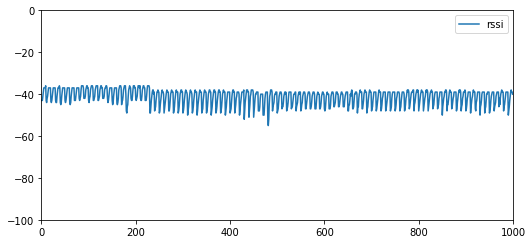

In [78]:
df_rssi = df_csi_nobody.loc[:, ['rssi']]
df_rssi.plot(y=['rssi'])
plt.axis([0, len(df_rssi.index), -100, 0])

In [79]:
df_csi = df_csi_nobody.loc[:, ['len', 'data']]
print(df_csi)

     len                                               data
0    128  [0,0,0,-10,0,-10,-1,-10,-1,-9,-1,-9,-1,-9,-1,-...
1    128  [0,0,-10,1,-10,1,-10,1,-10,1,-9,1,-9,2,-9,2,-9...
2    128  [0,0,8,1,8,1,8,1,8,1,8,0,8,0,8,0,8,-1,7,-1,8,-...
3    128  [0,0,1,8,1,8,1,8,1,8,2,8,2,8,3,8,3,8,3,8,4,8,5...
4    128  [0,0,9,-2,9,-3,9,-2,9,-3,9,-3,9,-3,9,-3,9,-3,9...
..   ...                                                ...
995  128  [0,0,5,9,5,9,5,9,5,9,5,9,5,9,5,8,5,8,5,8,5,7,6...
996  128  [0,0,6,7,-1,8,0,5,4,12,5,4,-1,9,0,7,6,9,4,10,3...
997  128  [0,0,-6,-8,-6,-8,-6,-7,-6,-7,-6,-7,-6,-6,-7,-6...
998  128  [0,0,7,5,7,5,7,5,7,5,7,5,7,5,7,4,7,4,8,3,8,3,8...
999  128  [0,0,-10,2,-10,3,-10,3,-10,3,-9,3,-9,3,-9,3,-8...

[1000 rows x 2 columns]


In [116]:
# subcarrier 1-26, 38-63 are valid subcarriers
select_list = []
select_list += range(1,27)
select_list += range(38,64)

In [117]:
# get_csi_phase_amp(df_csi_nobody)
len(df_csi_nobody.index)

1000

In [118]:
df_csi_1p.iloc[0]['len'] // 2

64

In [119]:
# for csi in enumerate(df_csi_nobody.iloc):
#     json.loads(csi['data'])

In [120]:
def get_csi_phase_amp(df_dataframe):
    size_x = len(df_dataframe.index)
    size_y = df_dataframe.iloc[0]['len'] // 2
    array_csi = np.zeros([size_x, size_y], dtype=np.complex64)
    phase_csi_deg = np.zeros([size_x, size_y], dtype=np.complex64)
    phase_csi_raw = np.zeros([size_x, size_y], dtype=np.complex64)
    amplitude_csi = np.zeros([size_x, size_y], dtype=np.complex64)
    for x, csi in enumerate(df_dataframe.iloc):
            csi_raw_data = json.loads(csi['data'])
            for y in range(0, len(csi_raw_data), 2):
                array_csi[x][y//2] = complex(csi_raw_data[y], csi_raw_data[y + 1])

                if csi_raw_data[y + 1] != 0:
                    phase_csi_deg[x][y//2] = math.atan(float(csi_raw_data[y])/float(csi_raw_data[y + 1])) * 180.0/math.pi
                    phase_csi_raw[x][y//2] = math.atan(float(csi_raw_data[y])/float(csi_raw_data[y + 1]))
                else:
                    phase_csi_deg[x][y//2] = 0
                    phase_csi_raw[x][y//2] = 0

                amplitude_csi[x][y//2] = math.sqrt(pow(csi_raw_data[y], 2) + pow(csi_raw_data[y + 1], 2))
    array_csi_modulus = abs(array_csi) 
    columns = [f"subcarrier{i}" for i in range(0, size_y)]
    df_csi_raw = pd.DataFrame(array_csi_modulus, columns=columns)
    df_csi_phase_deg = pd.DataFrame(phase_csi_deg, columns = columns)
    df_csi_phase_raw = pd.DataFrame(phase_csi_raw, columns = columns)
    df_csi_amplitude = pd.DataFrame(amplitude_csi, columns = columns)
    
#     sort out the valid csi
    df_csi_valid =pd.DataFrame()
    df_csi_amplitude_valid = pd.DataFrame()
    df_csi_phase_valid_deg = pd.DataFrame()
    df_csi_phase_valid_raw = pd.DataFrame()
    for i in select_list:
        df_csi_valid[f"subcarrier{i}"] = df_csi_raw[f"subcarrier{i}"]
        df_csi_phase_valid_deg[f"subcarrier{i}"] = df_csi_phase_deg[f"subcarrier{i}"]
        df_csi_phase_valid_raw[f"subcarrier{i}"] = df_csi_phase_raw[f"subcarrier{i}"]
        df_csi_amplitude_valid[f"subcarrier{i}"] = df_csi_amplitude[f"subcarrier{i}"]
    
    return df_csi_amplitude_valid, df_csi_phase_valid_deg, df_csi_valid
#     return df_csi_valid, df_csi_phase_valid_raw, df_csi_amplitude_valid
#     return df_csi_valid, df_csi_phase_valid_, df_csi_amplitude_valid

In [121]:
zero_csi_valid, zero_phase_valid, zero_amp_valid = get_csi_phase_amp(df_csi_nobody)
one_csi_valid, one_phase_valid, one_amp_valid = get_csi_phase_amp(df_csi_1p)
two_csi_valid, two_phase_valid, two_amp_valid = get_csi_phase_amp(df_csi_2p)

In [122]:
# zero_amp_valid = zero_amp_valid.reset_index()
# zero_amp_valid['index']

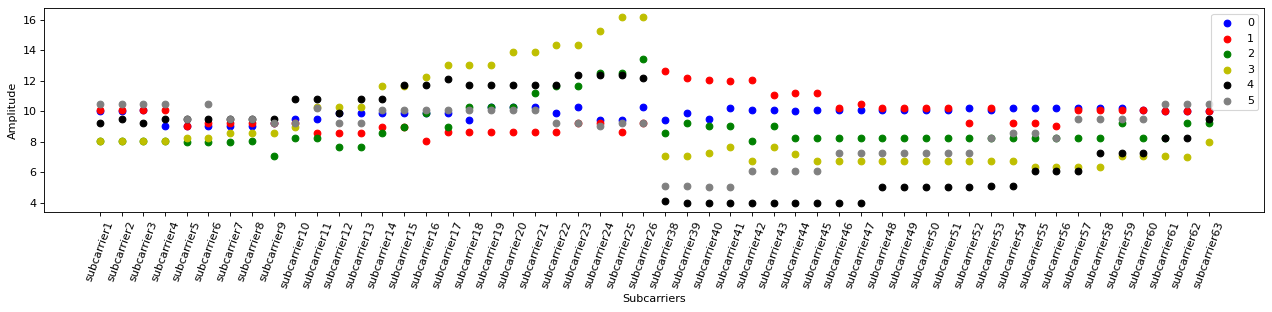

In [136]:
cols =list(zero_amp_valid.columns.values)

fig = plt.figure(figsize=(16, 4), dpi=80)
ax1 = fig.add_subplot(111)
df = zero_amp_valid
ax1.scatter(x = cols, y= df.iloc[0], color="b", label="0")
ax1.scatter(x = cols, y= df.iloc[1], color="r", label="1")
ax1.scatter(x = cols, y= df.iloc[2], color="g", label="2")
ax1.scatter(x = cols, y= df.iloc[3], color="y", label="3")
ax1.scatter(x = cols, y= df.iloc[4], color="black", label="4")
ax1.scatter(x = cols, y= df.iloc[5], color="gray", label="5")





plt.legend(loc='upper right')
plt.xticks(rotation=70)
ax1.set_xlabel("Subcarriers")
ax1.set_ylabel("Amplitude")
plt.show()

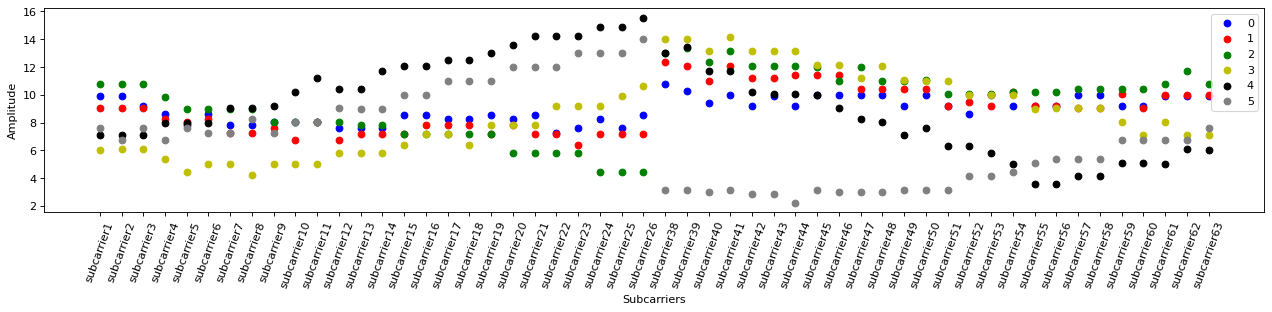

In [134]:

cols =list(zero_amp_valid.columns.values)

fig = plt.figure(figsize=(16, 4), dpi=80)
ax1 = fig.add_subplot(111)
df = one_amp_valid
ax1.scatter(x = cols, y= df.iloc[0], color="b", label="0")
ax1.scatter(x = cols, y= df.iloc[1], color="r", label="1")
ax1.scatter(x = cols, y= df.iloc[2], color="g", label="2")
ax1.scatter(x = cols, y= df.iloc[3], color="y", label="3")
ax1.scatter(x = cols, y= df.iloc[4], color="black", label="4")
ax1.scatter(x = cols, y= df.iloc[5], color="gray", label="5")





plt.legend(loc='upper right')
plt.xticks(rotation=70)
ax1.set_xlabel("Subcarriers")
ax1.set_ylabel("Amplitude")
plt.show()

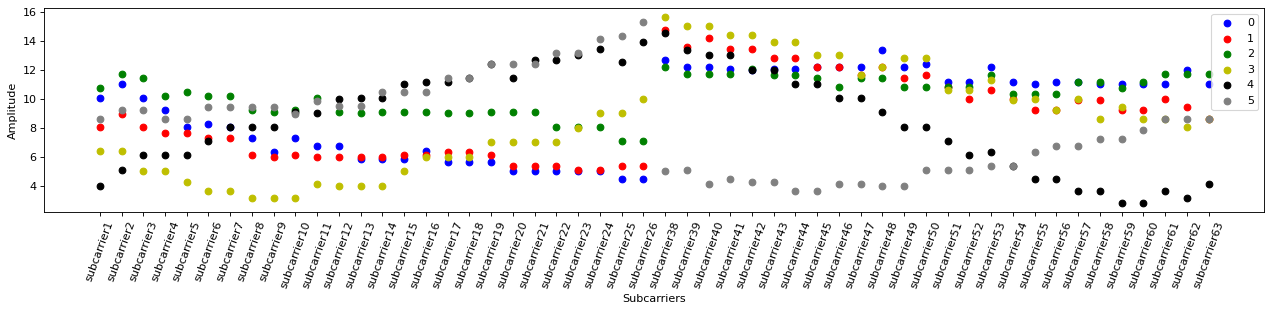

In [135]:
cols =list(zero_amp_valid.columns.values)

fig = plt.figure(figsize=(16, 4), dpi=80)
ax1 = fig.add_subplot(111)
df = two_amp_valid
ax1.scatter(x = cols, y= df.iloc[0], color="b", label="0")
ax1.scatter(x = cols, y= df.iloc[1], color="r", label="1")
ax1.scatter(x = cols, y= df.iloc[2], color="g", label="2")
ax1.scatter(x = cols, y= df.iloc[3], color="y", label="3")
ax1.scatter(x = cols, y= df.iloc[4], color="black", label="4")
ax1.scatter(x = cols, y= df.iloc[5], color="gray", label="5")





plt.legend(loc='upper right')
plt.xticks(rotation=70)
ax1.set_xlabel("Subcarriers")
ax1.set_ylabel("Amplitude")
plt.show()

In [27]:
def sort_zero_sub_with_truth(df_dataframe, select_list, divide_index, truth):
    # collect zero subcarrier across all csi data
    zero_sub_data = []
    for i in range(df_dataframe.shape[0]):
        y = []
        for j in select_list:
    #             print(df_csi_phase_valid[f"subcarrier{j}"])
            y.append(df_dataframe.iloc[i][f"subcarrier{j}"])
        x = select_list
        cs_y = CubicSpline(x,y,bc_type='natural')
#         y.append(cs_y(32))
        if cs_y(32) < 0:
            zero_sub_data.append(-abs(cs_y(32)))
        else:
            zero_sub_data.append(abs(cs_y(32)))
#         zero_sub_data.append(z)
#     print(len(zero_sub_data))

    data_by_event = []
    data_only = []
    for i in range(df_dataframe.shape[0]//divide_index):
        x = []
        for j in range(divide_index):
            x.append(zero_sub_data[10*i+j])
        data_only.append(x)
#         data_by_event.append([x,truth])
            
#     print(data_only)
    return data_only

In [28]:
zero_phase_valid

,subcarrier1,subcarrier2,subcarrier3,subcarrier4,subcarrier5,subcarrier6,subcarrier7,subcarrier8,subcarrier9,subcarrier10,...,subcarrier54,subcarrier55,subcarrier56,subcarrier57,subcarrier58,subcarrier59,subcarrier60,subcarrier61,subcarrier62,subcarrier63
0,-0.000000+0.000000j,-0.000000+0.000000j,5.710593+0.000000j,6.340192+0.000000j,6.340192+0.000000j,6.340192+0.000000j,6.340192+0.000000j,6.340192+0.000000j,12.528808+0.000000j,18.434948+0.000000j,...,-11.309933+0.000000j,-11.309933+0.000000j,-11.309933+0.000000j,-11.309933+0.000000j,-11.309933+0.000000j,-11.309933+0.000000j,-5.710593+0.000000j,-0.000000+0.000000j,-0.000000+0.000000j,-0.000000+0.000000j
1,-84.289406+0.000000j,-84.289406+0.000000j,-84.289406+0.000000j,-84.289406+0.000000j,-83.659805+0.000000j,-77.471191+0.000000j,-77.471191+0.000000j,-77.471191+0.000000j,-77.471191+0.000000j,-77.471191+0.000000j,...,77.471191+0.000000j,77.471191+0.000000j,83.659805+0.000000j,84.289406+0.000000j,84.289406+0.000000j,84.289406+0.000000j,84.289406+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
2,82.874985+0.000000j,82.874985+0.000000j,82.874985+0.000000j,82.874985+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,-82.874985+0.000000j,-81.869896+0.000000j,-75.963753+0.000000j,...,75.963753+0.000000j,75.963753+0.000000j,75.963753+0.000000j,75.963753+0.000000j,75.963753+0.000000j,77.471191+0.000000j,75.963753+0.000000j,75.963753+0.000000j,77.471191+0.000000j,77.471191+0.000000j
3,7.125016+0.000000j,7.125016+0.000000j,7.125016+0.000000j,7.125016+0.000000j,14.036243+0.000000j,14.036243+0.000000j,20.556046+0.000000j,20.556046+0.000000j,20.556046+0.000000j,26.565052+0.000000j,...,-26.565052+0.000000j,-18.434948+0.000000j,-18.434948+0.000000j,-18.434948+0.000000j,-18.434948+0.000000j,-8.130102+0.000000j,-8.130102+0.000000j,-8.130102+0.000000j,0.000000+0.000000j,0.000000+0.000000j
4,-77.471191+0.000000j,-71.565048+0.000000j,-77.471191+0.000000j,-71.565048+0.000000j,-71.565048+0.000000j,-71.565048+0.000000j,-71.565048+0.000000j,-71.565048+0.000000j,-71.565048+0.000000j,-68.198593+0.000000j,...,-78.690071+0.000000j,-80.537682+0.000000j,-80.537682+0.000000j,-80.537682+0.000000j,-74.054604+0.000000j,-74.054604+0.000000j,-74.054604+0.000000j,-75.963753+0.000000j,-75.963753+0.000000j,-71.565048+0.000000j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,29.054604+0.000000j,29.054604+0.000000j,29.054604+0.000000j,29.054604+0.000000j,29.054604+0.000000j,29.054604+0.000000j,32.005383+0.000000j,32.005383+0.000000j,32.005383+0.000000j,35.537678+0.000000j,...,29.744881+0.000000j,29.744881+0.000000j,29.744881+0.000000j,32.005383+0.000000j,32.005383+0.000000j,32.005383+0.000000j,32.005383+0.000000j,29.054604+0.000000j,29.054604+0.000000j,29.054604+0.000000j
996,40.601295+0.000000j,-7.125016+0.000000j,0.000000+0.000000j,18.434948+0.000000j,51.340191+0.000000j,-6.340192+0.000000j,0.000000+0.000000j,33.690067+0.000000j,21.801409+0.000000j,18.434948+0.000000j,...,22.619865+0.000000j,45.000000+0.000000j,0.000000+0.000000j,41.185925+0.000000j,30.963757+0.000000j,18.434948+0.000000j,33.690067+0.000000j,5.710593+0.000000j,30.963757+0.000000j,18.434948+0.000000j
997,36.869896+0.000000j,36.869896+0.000000j,40.601295+0.000000j,40.601295+0.000000j,40.601295+0.000000j,45.000000+0.000000j,49.398705+0.000000j,49.398705+0.000000j,54.462322+0.000000j,54.462322+0.000000j,...,23.962488+0.000000j,23.962488+0.000000j,23.962488+0.000000j,29.054604+0.000000j,29.054604+0.000000j,29.054604+0.000000j,29.054604+0.000000j,29.054604+0.000000j,33.690067+0.000000j,36.869896+0.000000j
998,54.462322+0.000000j,54.462322+0.000000j,54.462322+0.000000j,54.462322+0.000000j,54.462322+0.000000j,54.462322+0.000000j,60.255119+0.000000j,60.255119+0.000000j,69.443954+0.000000j,69.443954+0.000000j,...,39.805573+0.000000j,45.000000+0.000000j,45.000000+0.000000j,45.000000+0.000000j,45.000000+0.000000j,45.000000+0.000000j,45.000000+0.000000j,49.398705+0.000000j,49.398705+0.

In [29]:
zero_phase_by_event_truth = sort_zero_sub_with_truth(zero_phase_valid, select_list, 10, 0)
zero_amp_by_event_truth = sort_zero_sub_with_truth(zero_amp_valid, select_list, 10, 0)
zero_valid_w_truth = sort_zero_sub_with_truth(zero_csi_valid, select_list, 10, 0)

one_phase_by_event_truth = sort_zero_sub_with_truth(one_phase_valid, select_list, 10, 1)
one_amp_by_event_truth = sort_zero_sub_with_truth(one_amp_valid, select_list, 10, 1)
one_valid_w_truth = sort_zero_sub_with_truth(one_csi_valid, select_list, 10, 1)

two_phase_by_event_truth = sort_zero_sub_with_truth(two_phase_valid, select_list, 10, 2)
two_amp_by_event_truth = sort_zero_sub_with_truth(two_amp_valid, select_list, 10, 2)
two_valid_w_truth = sort_zero_sub_with_truth(two_csi_valid, select_list, 10, 2)

In [30]:
len(one_phase_by_event_truth)


100

In [31]:
all_phase_data = []
for i in range(len(zero_phase_by_event_truth)):
    all_phase_data.append(zero_phase_by_event_truth[i])
#     all_phase_data.append(one_phase_by_event_truth[i])
#     all_phase_data.append(two_phase_by_event_truth[i])
# random shuffle the data
# random.shuffle(all_phase_data)

all_amp_data = []
for i in range(len(zero_phase_by_event_truth)):
    all_amp_data.append(zero_amp_by_event_truth[i])
#     all_amp_data.append(one_amp_by_event_truth[i])
#     all_amp_data.append(two_amp_by_event_truth[i])
# random shuffle the data
# random.shuffle(all_amp_data)

all_csi_data = []
for i in range(len(zero_phase_by_event_truth)):
    all_csi_data.append(zero_valid_w_truth[i])
#     all_csi_data.append(one_valid_w_truth[i])
#     all_csi_data.append(two_valid_w_truth[i])
# random shuffle the data
# random.shuffle(all_csi_data)

# 到这儿所有的data处理应该都完成了，每个list中每个元素的格式是：【【十个数，每channel的central subcarrier的amp/phase】，0/1/2取决于ground truth】

In [32]:
all_phase_data

[[37.964895128832936,
  -43.14881824465576,
  -53.06591397807145,
  4.221775458946244,
  -224.18850718272887,
  -2.688542470014673,
  24.049431149733937,
  30.69469516896191,
  -40.4694883363682,
  -12.609277415084193],
 [-178.25819269538573,
  17.02712723941758,
  -28.778174507108112,
  205.70016890235195,
  69.45451597474694,
  89.8622105383809,
  31.571533530728512,
  -13.944899717627763,
  70.0225654240132,
  -50.818246847802804],
 [-126.54549654670367,
  33.58472542982183,
  -26.52141569655824,
  21.685992695163883,
  -0.754481129611392,
  -25.111299933061904,
  41.28673908568429,
  78.89992272762402,
  -38.03457824309152,
  51.78917118704199],
 [87.73074732456377,
  78.85431558592357,
  53.07837667548476,
  30.362050674662857,
  32.305019843191005,
  -38.45684329856185,
  89.29304097796003,
  86.47066322245205,
  74.78058790857291,
  65.7588547861568],
 [-364.08452285325416,
  -3.7440024998780803,
  4.6488930019622945,
  88.99717484559461,
  -29.789434315463403,
  -25.40606034746

In [33]:
with open('csi_phase_processed_data.csv', 'w') as filehandle:
    for item in all_phase_data:
        item_str = str(item)
        print(item_str)
        filehandle.writelines("%s\n" % item_str[1:-1])
#     filehandle.writelines("%s\n" % place for place in all_phase_data)
filehandle.close()

with open('csi_amp_processed_data.csv', 'w') as filehandle:
     for item in all_amp_data:
        item_str = str(item)
        print(item_str)
        filehandle.writelines("%s\n" % item_str[1:-1])
#     filehandle.writelines("%s\n" % place for place in all_amp_data)
filehandle.close()

with open('csi_abs_processed_data.csv', 'w') as filehandle:
     for item in all_csi_data:
        item_str = str(item)
        print(item_str)
        filehandle.writelines("%s\n" % item_str[1:-1])
#     filehandle.writelines("%s\n" % place for place in all_csi_data)
filehandle.close()

[37.964895128832936, -43.14881824465576, -53.06591397807145, 4.221775458946244, -224.18850718272887, -2.688542470014673, 24.049431149733937, 30.69469516896191, -40.4694883363682, -12.609277415084193]
[-178.25819269538573, 17.02712723941758, -28.778174507108112, 205.70016890235195, 69.45451597474694, 89.8622105383809, 31.571533530728512, -13.944899717627763, 70.0225654240132, -50.818246847802804]
[-126.54549654670367, 33.58472542982183, -26.52141569655824, 21.685992695163883, -0.754481129611392, -25.111299933061904, 41.28673908568429, 78.89992272762402, -38.03457824309152, 51.78917118704199]
[87.73074732456377, 78.85431558592357, 53.07837667548476, 30.362050674662857, 32.305019843191005, -38.45684329856185, 89.29304097796003, 86.47066322245205, 74.78058790857291, 65.7588547861568]
[-364.08452285325416, -3.7440024998780803, 4.6488930019622945, 88.99717484559461, -29.789434315463403, -25.40606034746726, -164.29066745470837, 76.2894767986164, -29.20951556368736, -4.973180388657821]
[51.955